# Customer Segmentation Using KMeans Clustering Based on RFM Metrics

**Introduction**:
Customer segmentation is a crucial technique for businesses seeking to tailor their marketing strategies and enhance customer retention. This project uses KMeans clustering to segment customers based on three key metrics: Recency, Frequency, and Monetary value (RFM). RFM analysis provides valuable insights into customer behavior by evaluating how recent their last purchase was (Recency), how often they make purchases (Frequency), and how much they spend (Monetary Value). By applying KMeans clustering, customers are grouped into distinct segments, allowing businesses to target them more effectively. This segmentation is fundamental for personalized marketing, improving customer satisfaction, and optimizing resource allocation.

TLDR : In summary, customer segmentation using KMeans clustering based on RFM metrics enables businesses to gain a deeper understanding of their customers' behaviors, leading to more targeted strategies, improved customer experiences, and better business outcomes.

### Benefits of Customer Segmentation Using KMeans Clustering:

`Personalized Marketing`: By segmenting customers based on their purchasing behaviors, businesses can tailor their marketing campaigns. For example, high-value customers (Retain) can receive loyalty rewards, while low-frequency customers (Re-engage) might be offered promotions to encourage more purchases. This personalization increases the likelihood of customer engagement and conversion.

`Improved Customer Retention`: Understanding customer segments allows businesses to identify which groups need more attention. Active customers with frequent purchases can be rewarded to ensure they stay loyal, while dormant customers can be targeted with re-engagement strategies. This targeted approach helps retain customers and reduces churn.

`Optimized Resource Allocation`: With a clearer understanding of customer segments, businesses can allocate resources more efficiently. High-value customers can be prioritized for exclusive offers, while lower-priority customers can receive general promotions. This improves the cost-effectiveness of marketing campaigns.

`Increased Customer Lifetime Value (CLV)`: By identifying segments with the potential to spend more or purchase more frequently, businesses can create strategies that increase the overall lifetime value of their customers. For instance, the "Nurture" group could be gradually transformed into higher-value customers through effective marketing.

`Actionable Insights for Business Strategy`: Segmentation provides actionable insights that can influence broader business strategies, from product development to customer service. For example, if a significant portion of customers falls into the "Re-engage" category, businesses may decide to introduce new features or offer special deals to win them back.

`Data-Driven Decision Making`: The KMeans clustering algorithm provides a data-driven approach to customer segmentation, removing the guesswork from business decisions. With objective and quantifiable insights into customer behavior, businesses can make more informed decisions that are likely to result in higher returns on investment.

---

## Part 1: Recency, Frequency , Monetary Analysis

#### Step 1: Data Preprocessing
After loading the data, let's check the basic data structure and ensure that the columns are correctly formatted. We’ll also convert the Date column to a datetime type for later calculations:

In [1]:
import pandas as pd
#for supressing KMeans warnings
import os
os.environ["OMP_NUM_THREADS"] = "1"

data = pd.read_csv('../data/processed/retail_sales_dataset.csv')
data.info()

data['Date'] = pd.to_datetime(data['Date'])
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Product Category  1000 non-null   object
 3   Quantity          1000 non-null   int64 
 4   Price per Unit    1000 non-null   int64 
 5   Total Amount      1000 non-null   int64 
 6   Customer ID       1000 non-null   object
 7   Gender            1000 non-null   object
 8   Age               1000 non-null   int64 
 9   City              1000 non-null   object
 10  Province          1000 non-null   object
 11  Country           1000 non-null   object
 12  Season            1000 non-null   object
 13  is_discount       1000 non-null   bool  
 14  Customer Type     1000 non-null   object
 15  Total Spend       1000 non-null   int64 
 16  Product ID        1000 non-null   int64 
dtypes: bool(1), int

,Transaction ID,Date,Product Category,Quantity,Price per Unit,Total Amount,Customer ID,Gender,Age,City,Province,Country,Season,is_discount,Customer Type,Total Spend,Product ID
0,1,2023-01-01,Beauty,3,500,1500,CUST045,Female,55,Montreal,Quebec,Canada,Winter,True,New,10525,5
1,2,2023-01-01,Clothing,3,300,900,CUST041,Male,34,Charlottetown,Prince Edward Island,Canada,Winter,True,New,7650,9
2,3,2023-01-01,Clothing,4,300,1200,CUST022,Male,18,Gatineau,Quebec,Canada,Winter,True,New,11785,9
3,4,2023-01-02,Electronics,3,30,90,CUST007,Male,46,Saint John,New Brunswick,Canada,Winter,True,New,4910,12
4,5,2023-01-02,Beauty,1,25,25,CUST044,Female,22,Gatineau,Quebec,Canada,Winter,True,New,8150,1


#### Step 2: Calculate RFM Metrics
We need to calculate the three RFM metrics: `Recency`, `Frequency`, and `Monetary Value`.

`Recency`: How long ago was the last purchase? (current date - last transaction date)

`Frequency`: How many purchases a customer made?

`Monetary`: Total amount spent by the customer.

In [2]:
# Set the reference date as the most recent transaction date
reference_date = data['Date'].max()

# Calculate Recency, Frequency, and Monetary for each customer
rfm = data.groupby('Customer ID').agg(
    recency=('Date', lambda x: (reference_date - x.max()).days),
    frequency=('Transaction ID', 'nunique'),
    monetary=('Total Amount', 'sum')
).reset_index()

rfm.head()

,Customer ID,recency,frequency,monetary
0,CUST001,14,25,14430
1,CUST002,48,21,11275
2,CUST003,6,22,10365
3,CUST004,7,16,11980
4,CUST005,25,26,8665


#### Step 3: Normalize the RFM Data

Since KMeans clustering is sensitive to the scale of the features, it’s important to scale the RFM metrics. We'll use `StandardScaler` to normalize the data.

In [3]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Scale the RFM values
rfm_scaled = scaler.fit_transform(rfm[['recency', 'frequency', 'monetary']])

# Create a DataFrame with scaled values
rfm_scaled_df = pd.DataFrame(rfm_scaled, columns=['recency', 'frequency', 'monetary'])

# Check the scaled data
rfm_scaled_df.head()

,recency,frequency,monetary
0,-0.238158,1.048977,1.355805
1,1.610554,0.209795,0.550237
2,-0.673149,0.419591,0.317886
3,-0.618775,-0.839181,0.730245
4,0.359955,1.258772,-0.116175


#### Step 4: Apply KMeans Clustering
Now that the data is ready, we can apply KMeans clustering. We will need to choose the number of clusters. This is usually done using methods like the `Elbow Method` to find the optimal number of clusters.

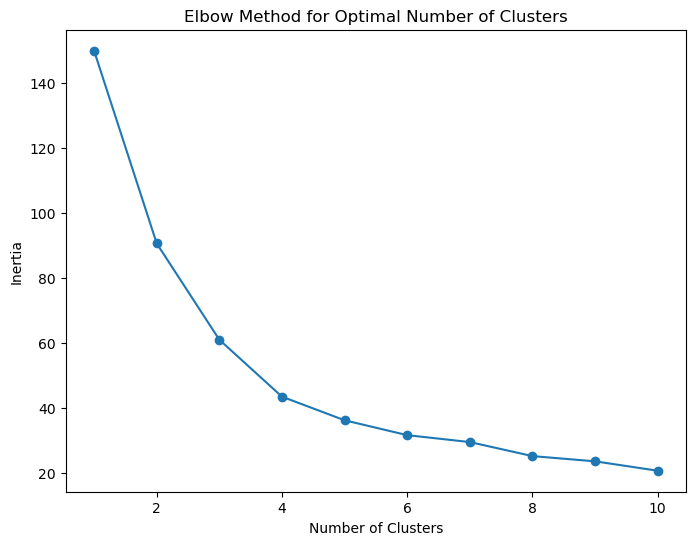

In [4]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Elbow method to find the optimal number of clusters
inertia = []
range_n_clusters = range(1, 11)

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(rfm_scaled_df)
    inertia.append(kmeans.inertia_)

# Plot the inertia to visualize the "elbow"
plt.figure(figsize=(8,6))
plt.plot(range_n_clusters, inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

#### Step 5: Fit the Kmeans Model
As the elbow method suggest an optimal number of `4 clusters` , we now proceed to fit the KMeans Model

In [5]:
# Fit the KMeans model with the chosen number of clusters 
kmeans = KMeans(n_clusters=4, random_state=42,max_iter=1000)
rfm['cluster'] = kmeans.fit_predict(rfm_scaled_df)

# Display the RFM table with cluster assignments
rfm.head()

,Customer ID,recency,frequency,monetary,cluster
0,CUST001,14,25,14430,1
1,CUST002,48,21,11275,0
2,CUST003,6,22,10365,0
3,CUST004,7,16,11980,3
4,CUST005,25,26,8665,0


#### Step 6: Analyzing the Clusters
We can now analyze the characteristics of each cluster

In [6]:
# Group by clusters and calculate the mean of each metric
cluster_summary = rfm.groupby('cluster').agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': 'mean'
}).reset_index()

cluster_summary

,cluster,recency,frequency,monetary
0,0,25.352941,21.235294,9395.588235
1,1,7.125000,28.000000,15940.625000
2,2,84.500000,13.000000,4565.000000
3,3,11.391304,16.913043,6940.000000


#### Step 7: Visualizing the Clusters
To better understand the clustering, we can visualize the clusters in a 2D or 3D plot:

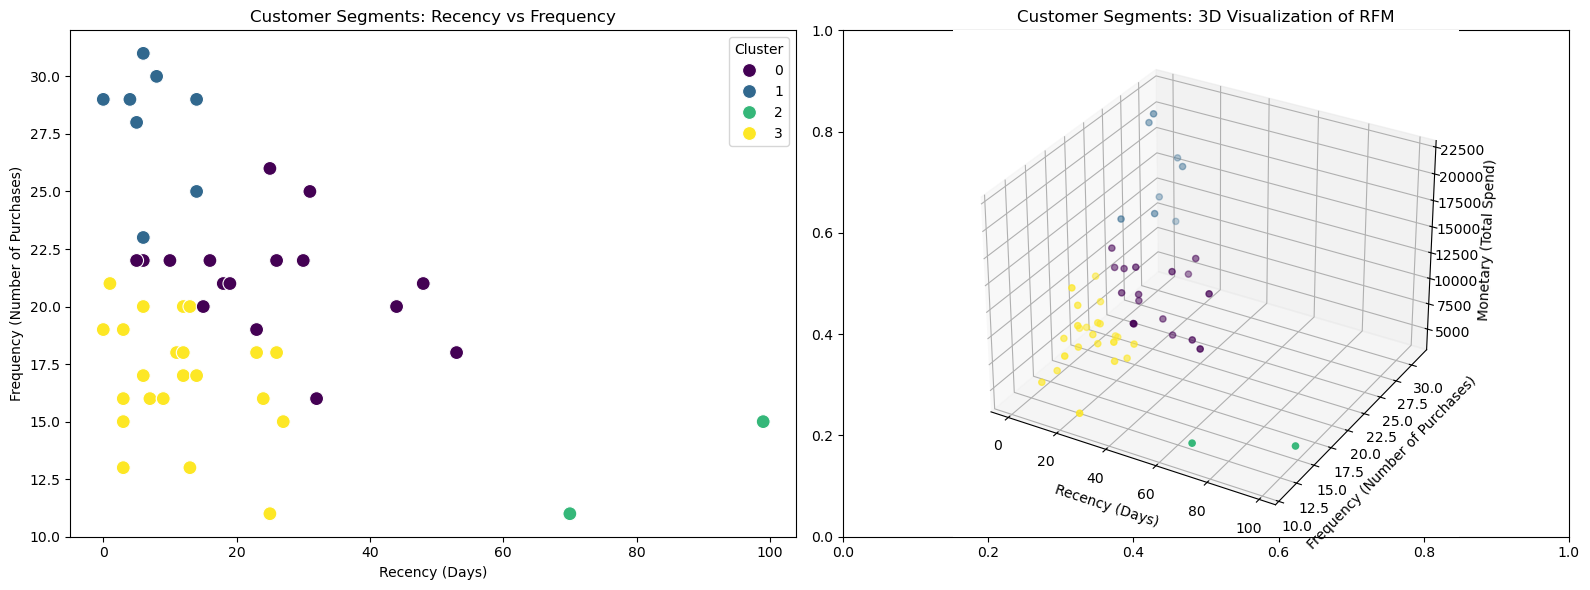

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Add the cluster column to the original RFM dataframe
rfm['cluster'] = kmeans.labels_

# Create a figure with 1 row and 2 columns (side by side plots)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot Recency vs Frequency with cluster colors (on the first subplot)
sns.scatterplot(data=rfm, x='recency', y='frequency', hue='cluster', palette='viridis', s=100, ax=axes[0])
axes[0].set_title('Customer Segments: Recency vs Frequency')
axes[0].set_xlabel('Recency (Days)')
axes[0].set_ylabel('Frequency (Number of Purchases)')
axes[0].legend(title='Cluster')

# Plotting in 3D (on the second subplot)
ax_3d = fig.add_subplot(122, projection='3d')  # 3D plot on the second position
ax_3d.scatter(rfm['recency'], rfm['frequency'], rfm['monetary'], c=rfm['cluster'], cmap='viridis')
ax_3d.set_xlabel('Recency (Days)')
ax_3d.set_ylabel('Frequency (Number of Purchases)')
ax_3d.set_zlabel('Monetary (Total Spend)')
ax_3d.set_title('Customer Segments: 3D Visualization of RFM')

# Show the plots side by side
plt.tight_layout()
plt.show()


----
## Part 2: Identifying and Mapping Cluster Labels
`Retain`, `Re-engage`, `Nurture`, `Reward`


After segmenting customers into distinct clusters based on the RFM metrics in Part 1, the next step is to map each cluster to specific customer actions. This mapping helps businesses determine the most effective way to engage with each group, ensuring that marketing efforts are targeted and impactful.

#### Step 1:
We have already calculated the RFM metrics and assigned clusters to customers. Now, we can group by the cluster label and calculate the average values of `Recency`, `Frequency`, and `Monetary` for each cluster.

In [8]:
# Calculate the average RFM values per cluster
cluster_avg_rfm = rfm.groupby('cluster').agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': 'mean'
}).reset_index()

cluster_avg_rfm

,cluster,recency,frequency,monetary
0,0,25.352941,21.235294,9395.588235
1,1,7.125000,28.000000,15940.625000
2,2,84.500000,13.000000,4565.000000
3,3,11.391304,16.913043,6940.000000


#### Step 2:  Map Cluster Labels to Customer Actions

Based on the **Recency**, **Frequency**, and **Monetary values**, we can categorize the clusters into different segments. Here is a simple mapping strategy:

`Retain`: High frequency, high monetary, and low recency (active and valuable customers).

`Re-engage`: Low frequency, high recency, and moderate monetary (customers who need to be re-engaged).

`Nurture`: Moderate frequency, moderate recency, and low monetary (potential to grow, but not yet very valuable).

`Reward`: Low recency, moderate frequency, and high monetary (long-time high spenders).

Based on the observations for `cluster_avg_rfm` we can define a function `categorize_cluster`, which would have pre-determined classes, based on our criteria that we can  now assign.

In [9]:
# Define a function to categorize clusters based on RFM values
def categorize_cluster(row):
    if row['frequency'] > 20 and row['monetary'] < 10000 and row['recency'] < 30:
        return 'Retain'
    elif row['frequency'] < 20 and row['recency'] > 60:
        return 'Re-engage'
    elif row['frequency'] < 20 and row['monetary'] < 8000:
        return 'Nurture'
    else:
        return 'Reward'

# Apply the categorization function to the average RFM data
cluster_avg_rfm['category'] = cluster_avg_rfm.apply(categorize_cluster, axis=1)

# Display the cluster summary with categories
cluster_avg_rfm

,cluster,recency,frequency,monetary,category
0,0,25.352941,21.235294,9395.588235,Retain
1,1,7.125000,28.000000,15940.625000,Reward
2,2,84.500000,13.000000,4565.000000,Re-engage
3,3,11.391304,16.913043,6940.000000,Nurture


#### Step 4: Fit the Kmeans Model

In [10]:
numeric_columns = ['recency', 'frequency', 'monetary']
kmeans = KMeans(n_clusters=4, random_state=42, max_iter=1000)

# Fit KMeans only on numeric data
cluster_labels = kmeans.fit_predict(rfm_scaled_df[numeric_columns])
rfm_scaled_df["Cluster"] = cluster_labels

#### Step 5: Visualizing the Clusters

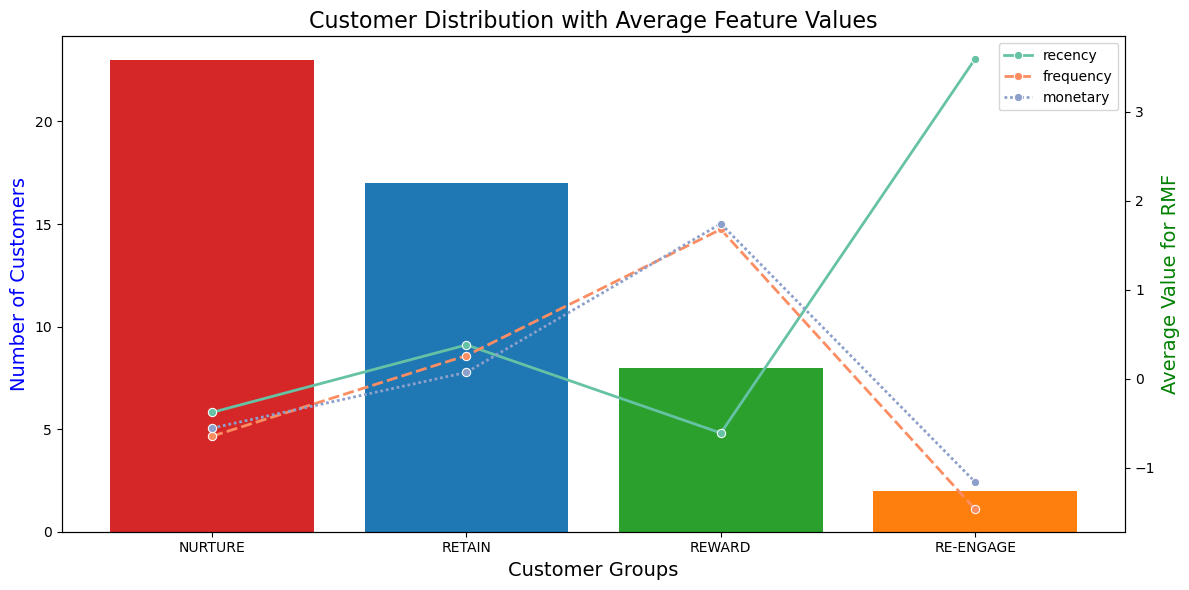

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans



# Define the custom colors for each cluster
cluster_colors = {0: '#1f77b4',  # Blue
                  1: '#2ca02c',  # Green
                  2: '#ff7f0e',  # Orange                   
                  3: '#d62728'}  # Red


# Map the color to each cluster
rfm_scaled_df['color'] = rfm_scaled_df['Cluster'].map(cluster_colors)

# Cluster labels mapping
cluster_labels_map = {
    0: "RETAIN",
    1: "REWARD",
    2: "RE-ENGAGE",
    3: "NURTURE"    
}

# Adding cluster labels to the DataFrame
rfm_scaled_df["ClusterLabel"] = rfm_scaled_df["Cluster"].map(cluster_labels_map)

# Count of customers per cluster
cluster_counts = rfm_scaled_df['ClusterLabel'].value_counts()
feature_means = rfm_scaled_df.groupby('ClusterLabel')[['recency', 'frequency', 'monetary']].mean()

# Create a color palette for the cluster labels based on the custom colors
label_color_palette = {
    'RETAIN': cluster_colors[0],
    'REWARD': cluster_colors[1],
    'RE-ENGAGE': cluster_colors[2],
    'NURTURE': cluster_colors[3]
}

# Bar plot for cluster distribution
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the bar chart without specifying a palette
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, ax=ax1)

for idx, label in enumerate(cluster_counts.index):
    ax1.patches[idx].set_facecolor(label_color_palette[label])

# Set labels and title
ax1.set_ylabel('Number of Customers', color='b', fontsize=14)
ax1.set_title('Customer Distribution with Average Feature Values', fontsize=16)
ax1.set_xlabel('Customer Groups', fontsize=14)

# Line plot for average feature values
ax2 = ax1.twinx()
sns.lineplot(data=feature_means, ax=ax2, palette='Set2', marker='o', linewidth=2)
ax2.set_ylabel('Average Value for RMF', color='g', fontsize=14)

plt.tight_layout()
plt.show()


#### Step 6: Generate a List of `Customer ID` and `Cluster Label`

This list allows the reatailer to be able to perform actions, thereby benefitting their business operations

In [12]:
rfm_scaled_df.insert(0, 'Customer ID', ['CUST{:03d}'.format(i) for i in range(1, len(rfm_scaled_df) + 1)])

new_df = rfm_scaled_df[['Customer ID', 'ClusterLabel']]
new_df

,Customer ID,ClusterLabel
0,CUST001,REWARD
1,CUST002,RETAIN
2,CUST003,RETAIN
3,CUST004,NURTURE
4,CUST005,RETAIN
5,CUST006,RETAIN
6,CUST007,RE-ENGAGE
7,CUST008,NURTURE
8,CUST009,NURTURE
9,CUST010,NURTURE


# Conclusion:

This project utilizes KMeans clustering to perform customer segmentation based on RFM metrics. After preprocessing the dataset and calculating Recency, Frequency, and Monetary values for each customer, we normalize the data to ensure accuracy in clustering. The optimal number of clusters is determined through the Elbow Method, and the KMeans model is applied to categorize customers into clusters. These clusters are then mapped to actionable customer groups such as "Retain," "Re-engage," "Nurture," and "Reward." Visualizations and statistical summaries are provided to analyze the characteristics of each cluster, helping businesses understand customer behaviors and target them with appropriate marketing actions. The outcome is a set of actionable insights that can drive customer retention strategies, improve engagement, and enhance revenue.